# <h> Cannibas Strain Project </h>                                                                                        


## Data link :- https://www.kaggle.com/datasets/gthrosa/leafly-cannabis-strains-metadata/data

#### Strain Characteristics:
-  1)Explore and visualize the distribution of THC levels across different strains.
-  2)Identify the most common terpenes in the dataset.

#### Effect Analysis:
-  1)Analyze the distribution of reported effects (e.g., relaxed, happy, euphoric) for each strain.
-  2)Identify strains that are commonly associated with specific effects.

#### Medical Use:
-  1)Investigate strains that are reported to be effective for medical conditions (e.g., pain, insomnia, anxiety).
-  2)Identify strains with potential therapeutic benefits based on reported effects.

#### Popular Strains:
-  1)Determine the popularity of different strains based on user ratings or mentions.
-  2)Identify strains that have won awards or gained recognition.

#### User Preferences:
-  1)Explore the relationship between THC levels and user-reported effects.
-  2)Analyze whether certain terpenes are more commonly associated with positive effects.

#### Correlation Analysis:
-  1)Investigate potential correlations between different reported effects.
-  2)Explore if there are patterns in terpene content based on reported effects.

#### Effect on Medical Conditions:
-  1)Analyze which strains are reported to be effective for specific medical conditions.
-  2)Identify potential strains for different health-related purposes.

#### Visualization of Strains:
-  1)Create visualizations (e.g., word clouds, bar charts) to represent the popularity of strains based on user reviews.

#### Machine Learning Predictions:
-  1)Build predictive models to estimate the likelihood of a strain being associated with specific effects or medical benefits.
- 2)Evaluate the accuracy of these models.

#### Cluster Analysis:
-  1)Use clustering algorithms to group strains based on similarities in characteristics.
-  2)Explore whether certain clusters are associated with particular effects or medical uses.

#### Comparison of Strain Types:
-  1)Compare characteristics, effects, and medical uses between different types of strains (indica, sativa, hybrid).

#### Impact of Terpenes:

-  1)Investigate the impact of individual terpenes on reported effects.
-  2) Identify terpenes that are commonly associated with positive or negative experiences.


In [1]:
#loading the needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master_data= pd.read_csv('leafly_strain_data.csv')
master_data.head()

name                                            img_url    type  \
0           GG4   https://images.leafly.com/flower-images/gg-4.jpg  Hybrid   
1  Wedding Cake  https://images.leafly.com/flower-images/weddin...  Hybrid   
2         Runtz  https://images.leafly.com/flower-images/runtz-...  Hybrid   
3        Gelato  https://images.leafly.com/flower-images/gelato...  Hybrid   
4    Blue Dream  https://images.leafly.com/flower-images/blue-d...  Hybrid   

  thc_level most_common_terpene  \
0       20%       Caryophyllene   
1       22%            Limonene   
2       19%            Limonene   
3       17%       Caryophyllene   
4       18%             Myrcene   

                                         description relaxed happy euphoric  \
0  Original Glue (GG4), developed by GG Strains, ...     66%   54%      51%   
1  Wedding Cake is a potent indica-hybrid marijua...     60%   50%      41%   
2  Runtz is a rare hybrid marijuana strain by Coo...     47%   62%      48%   
3  Gelato, aka Larry Bird, is a hybrid marijuana ...     54%   49%      46%   
4  Blue Dream is a sativa-dominant hybrid marijua...     48%   57%      52%   

  uplifted  ... fibromyalgia crohn's_disease phantom_limb_pain epilepsy  \
0      39%  ...           0%              0%                0%       0%   
1      35%  ...           0%              0%                0%       0%   
2      43%  ...           0%              0%                0%       0%   
3      37%  ...           0%              0%                0%       0%   
4      48%  ...           0%              0%                0%       0%   

  multiple_sclerosis parkinson's tourette's_syndrome alzheimer's hiv/aids  \
0                 0%          0%                  0%          0%       0%   
1                 0%          0%                  0%          0%       0%   
2                 0%          0%                  0%          0%       0%   
3                 0%          0%                  0%          0%       0%   
4                 0%          0%                  0%          0%       0%   

  tinnitus  
0       0%  
1       0%  
2       0%  
3       0%  
4       0%  

[5 rows x 64 columns]

In [3]:
master_data.shape

(4762, 64)

In [4]:
#master_data.info()

In [5]:
data = master_data.copy()

In [6]:
data.shape

(4762, 64)

In [7]:
data.thc_level.isnull().sum()


2027

##### Strain Characteristics:
*  Explore and visualize the distribution of THC levels across different strains.
*  Identify the most common terpenes in the dataset.

In [8]:
#To visualise these charactersitcs i would need the "Name", "Type" and "THC levels" colums, let's try making a new data 
#frame for just this perpouse 

vis = ['name', 'type','thc_level']
vis_thc_levels = data[vis].copy()
vis_thc_levels.head()

name    type thc_level
0           GG4  Hybrid       20%
1  Wedding Cake  Hybrid       22%
2         Runtz  Hybrid       19%
3        Gelato  Hybrid       17%
4    Blue Dream  Hybrid       18%

In [9]:
vis_thc_levels.type.unique()

array(['Hybrid', 'Indica', 'Sativa', nan], dtype=object)

In [10]:
vis_thc_levels.name.unique()

array(['GG4', 'Wedding Cake', 'Runtz', ..., 'Berry Noir',
       'South Central LA', 'Blueberry Waltz'], dtype=object)

In [11]:
print(vis_thc_levels['name'].value_counts())

Black Afghan         1
Kailua Pua           1
White Super Skunk    1
Forest Queen         1
Cherry Trance        1
                    ..
Love Is Love         1
The Lime             1
Triple OG            1
Cheddarwurst 2       1
Eagle Cookies        1
Name: name, Length: 4762, dtype: int64


In [12]:
print(vis_thc_levels['type'].value_counts())

Hybrid    2772
Indica     825
Sativa     510
Name: type, dtype: int64


In [13]:
print(vis_thc_levels['thc_level'].value_counts())

18%    366
17%    354
19%    328
20%    307
16%    265
21%    220
15%    161
22%    147
14%    103
23%    100
24%     68
13%     65
12%     36
25%     33
10%     30
11%     28
27%     24
26%     23
8%      20
9%      14
28%     11
29%      8
7%       7
30%      4
6%       4
31%      3
33%      3
4%       2
34%      1
Name: thc_level, dtype: int64


In [14]:
print("the total missing values in NAME are:- ",{vis_thc_levels['name'].isnull().sum()})
print("the total missing values in TYPE are:- ",{vis_thc_levels['type'].isnull().sum()})
print("the total missing values in THC_Level are:- ",{vis_thc_levels['thc_level'].isnull().sum()})

the total missing values in NAME are:-  {0}
the total missing values in TYPE are:-  {655}
the total missing values in THC_Level are:-  {2027}


In [15]:
#As there are 655 Types are missng but we can go wring with the type so it's better  
#i shoulld and them as "UNKNOWN" inspite of adding them by mean median or MODE
#insted of dropping it cause it would not make sense to remove the data

vis_thc_levels['type'].fillna('Unknown', inplace = True)
print("the total missing values in TYPE are:- ",{vis_thc_levels['type'].isnull().sum()})
vis_thc_levels['type'].value_counts()

the total missing values in TYPE are:-  {0}


Hybrid     2772
Indica      825
Unknown     655
Sativa      510
Name: type, dtype: int64

##### Answerring Question 1 :-<Center>  1)Explore and visualize the distribution of THC levels across different strains. </Center> 

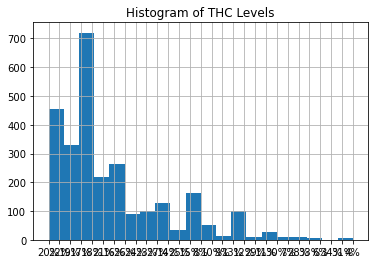

<Figure size 2160x432 with 0 Axes>

In [16]:
#As the THC levels are in percent I think i can add the missing values with 
#for this Could i would use the Mean/Median method to fill the data 
#but to fill it i would need to check if the data is normally distributed or there are outliers 

import matplotlib.pyplot as plt
vis_thc_levels['thc_level'].hist(bins=20)
plt.title('Histogram of THC Levels')
plt.figure(figsize=(30, 6))
plt.show()

In [17]:
#with this i see that the distribution is not mornal. i would have MEDIAN menthod to fill the missing data.
#to do that i would have to remove the "%" from the data else it would take it as float and then add the missing values
#then have to convert the entire thing to numeric values and then fill the missing values 
# Remove the percentage sign
# Ensure the 'thc_level' column is initially treated as a string
vis_thc_levels['thc_level'] = vis_thc_levels['thc_level'].astype(str)

# Remove the percentage sign
vis_thc_levels['thc_level'] = vis_thc_levels['thc_level'].str.replace('%', '')

# Convert to numeric and fill missing values with the mean
vis_thc_levels['thc_level'] = pd.to_numeric(vis_thc_levels['thc_level'], errors='coerce')
vis_thc_levels['thc_level'].fillna(vis_thc_levels['thc_level'].median(), inplace=True)

print("the total missing values in THC_Level are:", vis_thc_levels['thc_level'].isnull().sum())


the total missing values in THC_Level are: 0


In [18]:
#just to confirm if i have non missing values 
print("the total missing values in NAME are:- ",{vis_thc_levels['name'].isnull().sum()})
print("the total missing values in TYPE are:- ",{vis_thc_levels['type'].isnull().sum()})
print("the total missing values in THC_Level are:- ",{vis_thc_levels['thc_level'].isnull().sum()})

the total missing values in NAME are:-  {0}
the total missing values in TYPE are:-  {0}
the total missing values in THC_Level are:-  {0}


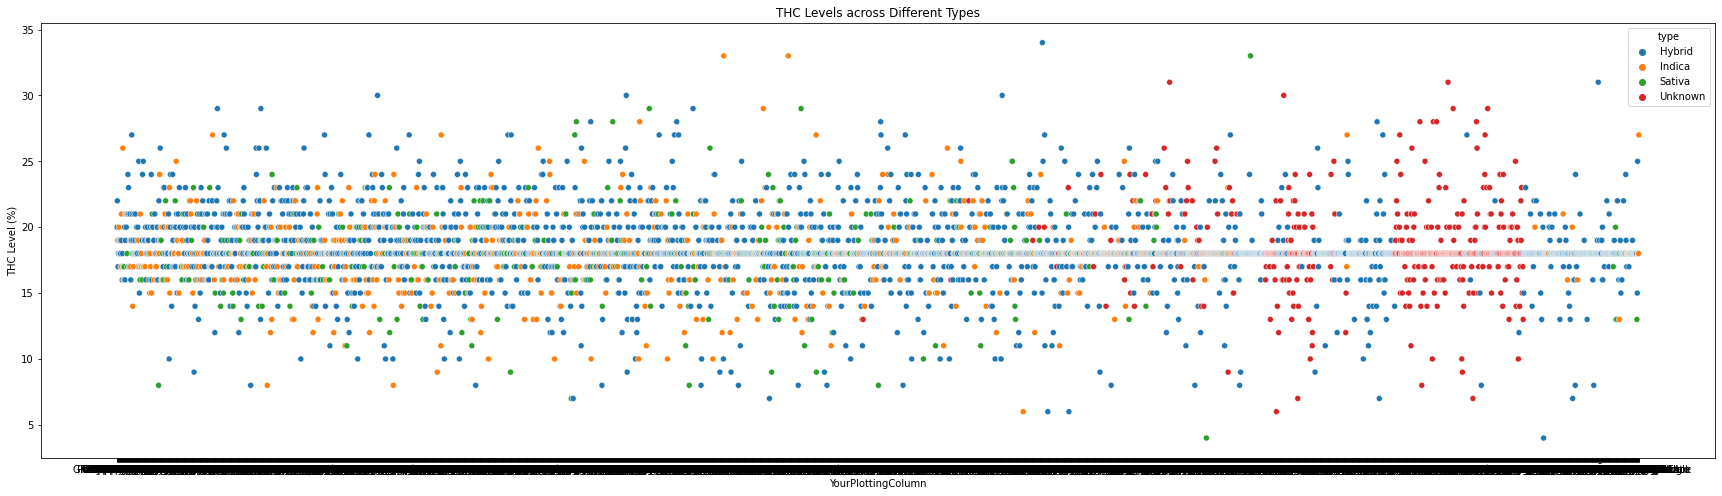

In [19]:
#now that i have all the non missing values i would go and visualize the distribution of all THC levels
#for the visualization i will use a scatter plot
plt.figure(figsize=(30, 8))
sns.scatterplot(x='name', y='thc_level', hue='type', data=vis_thc_levels)
plt.title('THC Levels across Different Types')
plt.xlabel('YourPlottingColumn')
plt.ylabel('THC Level (%)')
plt.show()

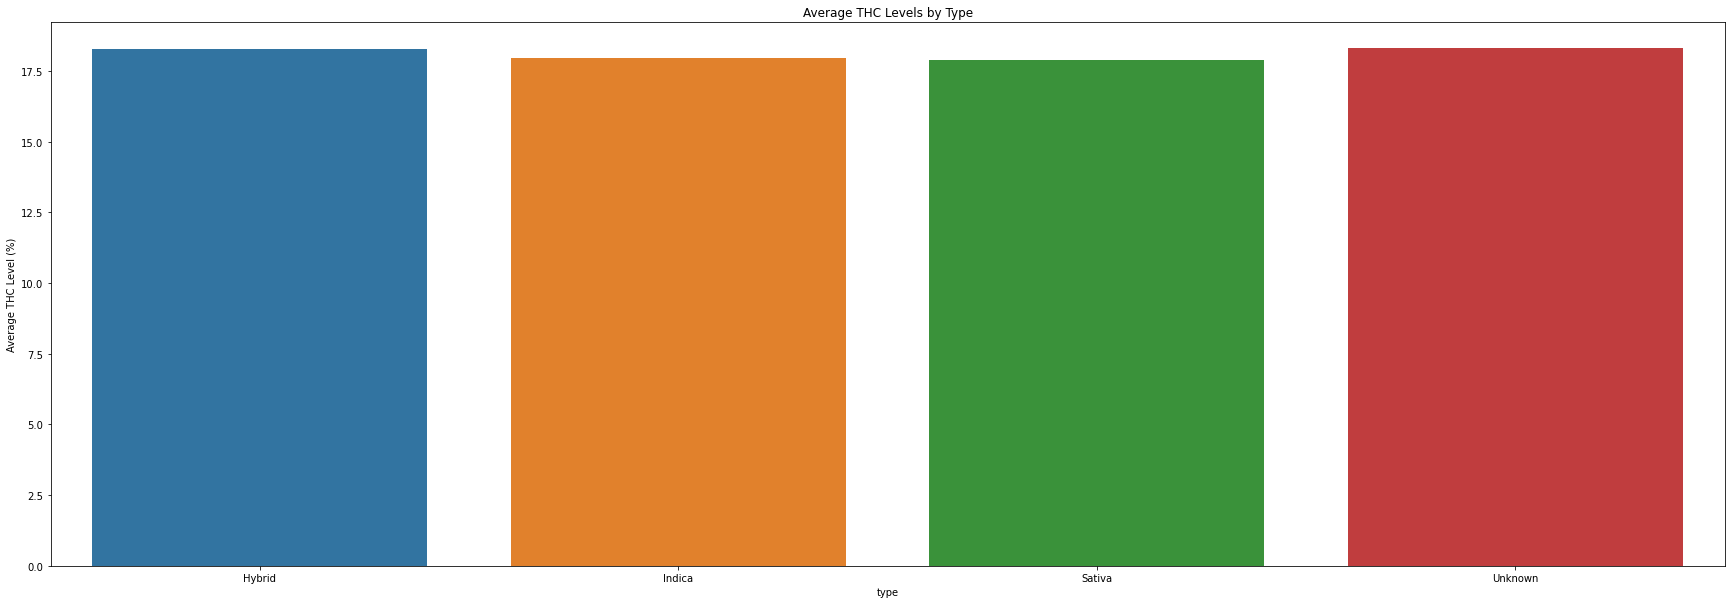

In [20]:
# As the data is not much clear , let me try plotting the Bar plot and see if it's more understandable 
plt.figure(figsize=(30, 10))
sns.barplot(x='type', y='thc_level', data=vis_thc_levels, ci=None)
plt.title('Average THC Levels by Type')
plt.ylabel('Average THC Level (%)')
plt.show()


##### Observations
-  As per my obervation , i thing all the Strains 'Hybrid' strain have the most higher THC levels compared to the rest 3 of the, 
-  But as the "Unknown" strain have would have a mix of all the strains togather , this has the higher rating then all the 3 of them
##### Questions
-  My doubt would be , do we have to consider the UNKNOWN strain , or would that be better if i just drop the missing values and just focus on the avaiable data??
-  If i drop the missing values, would there be any change in the rest of the data or will ot still remain the same 
-  is the bar plot and the observations correct so far and do they make any sense..  


In [21]:
### EDA for each and every colum 
eda_data = data.copy()
eda_data.head()

name                                            img_url    type  \
0           GG4   https://images.leafly.com/flower-images/gg-4.jpg  Hybrid   
1  Wedding Cake  https://images.leafly.com/flower-images/weddin...  Hybrid   
2         Runtz  https://images.leafly.com/flower-images/runtz-...  Hybrid   
3        Gelato  https://images.leafly.com/flower-images/gelato...  Hybrid   
4    Blue Dream  https://images.leafly.com/flower-images/blue-d...  Hybrid   

  thc_level most_common_terpene  \
0       20%       Caryophyllene   
1       22%            Limonene   
2       19%            Limonene   
3       17%       Caryophyllene   
4       18%             Myrcene   

                                         description relaxed happy euphoric  \
0  Original Glue (GG4), developed by GG Strains, ...     66%   54%      51%   
1  Wedding Cake is a potent indica-hybrid marijua...     60%   50%      41%   
2  Runtz is a rare hybrid marijuana strain by Coo...     47%   62%      48%   
3  Gelato, aka Larry Bird, is a hybrid marijuana ...     54%   49%      46%   
4  Blue Dream is a sativa-dominant hybrid marijua...     48%   57%      52%   

  uplifted  ... fibromyalgia crohn's_disease phantom_limb_pain epilepsy  \
0      39%  ...           0%              0%                0%       0%   
1      35%  ...           0%              0%                0%       0%   
2      43%  ...           0%              0%                0%       0%   
3      37%  ...           0%              0%                0%       0%   
4      48%  ...           0%              0%                0%       0%   

  multiple_sclerosis parkinson's tourette's_syndrome alzheimer's hiv/aids  \
0                 0%          0%                  0%          0%       0%   
1                 0%          0%                  0%          0%       0%   
2                 0%          0%                  0%          0%       0%   
3                 0%          0%                  0%          0%       0%   
4                 0%          0%                  0%          0%       0%   

  tinnitus  
0       0%  
1       0%  
2       0%  
3       0%  
4       0%  

[5 rows x 64 columns]

In [22]:
eda_data['most_common_terpene'].unique()


array(['Caryophyllene', 'Limonene', 'Myrcene', 'Terpinolene', 'Ocimene',
       nan, 'Pinene', 'Linalool', 'Humulene'], dtype=object)

In [23]:
eda_data

name                                            img_url  \
0                  GG4   https://images.leafly.com/flower-images/gg-4.jpg   
1         Wedding Cake  https://images.leafly.com/flower-images/weddin...   
2                Runtz  https://images.leafly.com/flower-images/runtz-...   
3               Gelato  https://images.leafly.com/flower-images/gelato...   
4           Blue Dream  https://images.leafly.com/flower-images/blue-d...   
...                ...                                                ...   
4757       Khyber Kush                                                NaN   
4758             Dorit                                                NaN   
4759        Berry Noir                                                NaN   
4760  South Central LA                                                NaN   
4761   Blueberry Waltz                                                NaN   

        type thc_level most_common_terpene  \
0     Hybrid       20%       Caryophyllene   
1     Hybrid       22%            Limonene   
2     Hybrid       19%            Limonene   
3     Hybrid       17%       Caryophyllene   
4     Hybrid       18%             Myrcene   
...      ...       ...                 ...   
4757  Hybrid       25%             Myrcene   
4758  Indica       NaN                 NaN   
4759  Indica       NaN                 NaN   
4760  Indica       NaN                 NaN   
4761  Indica       27%            Limonene   

                                            description relaxed happy  \
0     Original Glue (GG4), developed by GG Strains, ...     66%   54%   
1     Wedding Cake is a potent indica-hybrid marijua...     60%   50%   
2     Runtz is a rare hybrid marijuana strain by Coo...     47%   62%   
3     Gelato, aka Larry Bird, is a hybrid marijuana ...     54%   49%   
4     Blue Dream is a sativa-dominant hybrid marijua...     48%   57%   
...                                                 ...     ...   ...   
4757  An ode to the Khyber Pass that bridges Pakista...      0%    0%   
4758  Dorit is a 70/30 indica-dominant strain tailor...     83%    0%   
4759  Berry Noir is an indica strain that competed i...     66%    0%   
4760  South Central LA is a high-THC indica strain f...     75%    0%   
4761  Blueberry Waltz is an indica-dominant strain t...    100%   50%   

     euphoric uplifted  ... fibromyalgia crohn's_disease phantom_limb_pain  \
0         51%      39%  ...           0%              0%                0%   
1         41%      35%  ...           0%              0%                0%   
2         48%      43%  ...           0%              0%                0%   
3         46%      37%  ...           0%              0%                0%   
4         52%      48%  ...           0%              0%                0%   
...       ...      ...  ...          ...             ...               ...   
4757       0%       0%  ...           0%              0%                0%   
4758      66%      33%  ...           0%              0%                0%   
4759      50%      16%  ...           0%              0%                0%   
4760      75%      75%  ...           0%              0%                0%   
4761      50%     100%  ...           0%              0%                0%   

     epilepsy multiple_sclerosis parkinson's tourette's_syndrome alzheimer's  \
0          0%                 0%          0%                  0%          0%   
1          0%                 0%          0%                  0%          0%   
2          0%                 0%          0%                  0%          0%   
3          0%                 0%          0%                  0%          0%   
4          0%                 0%          0%                  0%          0%   
...       ...                ...         ...                 ...         ...   
4757       0%                 0%          0%                  0%          0%   
4758       0%                 0%          0%                  0%          0%   
4759  

In [24]:
eda_data.iloc[:, 6:] = eda_data.iloc[:, 6:].apply(pd.to_numeric, errors='coerce')
eda_data.head()

name                                            img_url    type  \
0           GG4   https://images.leafly.com/flower-images/gg-4.jpg  Hybrid   
1  Wedding Cake  https://images.leafly.com/flower-images/weddin...  Hybrid   
2         Runtz  https://images.leafly.com/flower-images/runtz-...  Hybrid   
3        Gelato  https://images.leafly.com/flower-images/gelato...  Hybrid   
4    Blue Dream  https://images.leafly.com/flower-images/blue-d...  Hybrid   

  thc_level most_common_terpene  \
0       20%       Caryophyllene   
1       22%            Limonene   
2       19%            Limonene   
3       17%       Caryophyllene   
4       18%             Myrcene   

                                         description relaxed happy euphoric  \
0  Original Glue (GG4), developed by GG Strains, ...     NaN   NaN      NaN   
1  Wedding Cake is a potent indica-hybrid marijua...     NaN   NaN      NaN   
2  Runtz is a rare hybrid marijuana strain by Coo...     NaN   NaN      NaN   
3  Gelato, aka Larry Bird, is a hybrid marijuana ...     NaN   NaN      NaN   
4  Blue Dream is a sativa-dominant hybrid marijua...     NaN   NaN      NaN   

  uplifted  ... fibromyalgia crohn's_disease phantom_limb_pain epilepsy  \
0      NaN  ...          NaN             NaN               NaN      NaN   
1      NaN  ...          NaN             NaN               NaN      NaN   
2      NaN  ...          NaN             NaN               NaN      NaN   
3      NaN  ...          NaN             NaN               NaN      NaN   
4      NaN  ...          NaN             NaN               NaN      NaN   

  multiple_sclerosis parkinson's tourette's_syndrome alzheimer's hiv/aids  \
0                NaN         NaN                 NaN         NaN      NaN   
1                NaN         NaN                 NaN         NaN      NaN   
2                NaN         NaN                 NaN         NaN      NaN   
3                NaN         NaN                 NaN         NaN      NaN   
4                NaN         NaN                 NaN         NaN      NaN   

  tinnitus  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 64 columns]

In [25]:
eda_data =pd.read_csv('leafly_strain_data.csv')
eda_data.head()

name                                            img_url    type  \
0           GG4   https://images.leafly.com/flower-images/gg-4.jpg  Hybrid   
1  Wedding Cake  https://images.leafly.com/flower-images/weddin...  Hybrid   
2         Runtz  https://images.leafly.com/flower-images/runtz-...  Hybrid   
3        Gelato  https://images.leafly.com/flower-images/gelato...  Hybrid   
4    Blue Dream  https://images.leafly.com/flower-images/blue-d...  Hybrid   

  thc_level most_common_terpene  \
0       20%       Caryophyllene   
1       22%            Limonene   
2       19%            Limonene   
3       17%       Caryophyllene   
4       18%             Myrcene   

                                         description relaxed happy euphoric  \
0  Original Glue (GG4), developed by GG Strains, ...     66%   54%      51%   
1  Wedding Cake is a potent indica-hybrid marijua...     60%   50%      41%   
2  Runtz is a rare hybrid marijuana strain by Coo...     47%   62%      48%   
3  Gelato, aka Larry Bird, is a hybrid marijuana ...     54%   49%      46%   
4  Blue Dream is a sativa-dominant hybrid marijua...     48%   57%      52%   

  uplifted  ... fibromyalgia crohn's_disease phantom_limb_pain epilepsy  \
0      39%  ...           0%              0%                0%       0%   
1      35%  ...           0%              0%                0%       0%   
2      43%  ...           0%              0%                0%       0%   
3      37%  ...           0%              0%                0%       0%   
4      48%  ...           0%              0%                0%       0%   

  multiple_sclerosis parkinson's tourette's_syndrome alzheimer's hiv/aids  \
0                 0%          0%                  0%          0%       0%   
1                 0%          0%                  0%          0%       0%   
2                 0%          0%                  0%          0%       0%   
3                 0%          0%                  0%          0%       0%   
4                 0%          0%                  0%          0%       0%   

  tinnitus  
0       0%  
1       0%  
2       0%  
3       0%  
4       0%  

[5 rows x 64 columns]

In [26]:
eda_data.drop(["img_url","description"] ,  axis =1, inplace = True )
eda_data.head(2)

name    type thc_level most_common_terpene relaxed happy euphoric  \
0           GG4  Hybrid       20%       Caryophyllene     66%   54%      51%   
1  Wedding Cake  Hybrid       22%            Limonene     60%   50%      41%   

  uplifted sleepy dry_mouth  ... fibromyalgia crohn's_disease  \
0      39%    27%       24%  ...           0%              0%   
1      35%     0%       17%  ...           0%              0%   

  phantom_limb_pain epilepsy multiple_sclerosis parkinson's  \
0                0%       0%                 0%          0%   
1                0%       0%                 0%          0%   

  tourette's_syndrome alzheimer's hiv/aids tinnitus  
0                  0%          0%       0%       0%  
1                  0%          0%       0%       0%  

[2 rows x 62 columns]

In [27]:
eda_data['name'].isnull().sum()


0

In [28]:
eda_data['type'].isnull().sum()

655

In [29]:
eda_data['type'].unique()

array(['Hybrid', 'Indica', 'Sativa', nan], dtype=object)

In [30]:
#eda_data.info()

In [31]:
eda_data['type'].fillna('Unknown', inplace=True)
eda_data['type'].isnull().sum()

0

In [32]:
eda_data["type"].replace ({"Hybrid" : 0, "Indica" : 1 , "Sativa" : 2 , "Unknown" : 3}, inplace = True)
eda_data.head()

name  type thc_level most_common_terpene relaxed happy euphoric  \
0           GG4     0       20%       Caryophyllene     66%   54%      51%   
1  Wedding Cake     0       22%            Limonene     60%   50%      41%   
2         Runtz     0       19%            Limonene     47%   62%      48%   
3        Gelato     0       17%       Caryophyllene     54%   49%      46%   
4    Blue Dream     0       18%             Myrcene     48%   57%      52%   

  uplifted sleepy dry_mouth  ... fibromyalgia crohn's_disease  \
0      39%    27%       24%  ...           0%              0%   
1      35%     0%       17%  ...           0%              0%   
2      43%     0%        9%  ...           0%              0%   
3      37%     0%       20%  ...           0%              0%   
4      48%     0%       29%  ...           0%              0%   

  phantom_limb_pain epilepsy multiple_sclerosis parkinson's  \
0                0%       0%                 0%          0%   
1                0%       0%                 0%          0%   
2                0%       0%                 0%          0%   
3                0%       0%                 0%          0%   
4                0%       0%                 0%          0%   

  tourette's_syndrome alzheimer's hiv/aids tinnitus  
0                  0%          0%       0%       0%  
1                  0%          0%       0%       0%  
2                  0%          0%       0%       0%  
3                  0%          0%       0%       0%  
4                  0%          0%       0%       0%  

[5 rows x 62 columns]

##### Hybrid ==> 0 , Indica ==> 1, Sativa ==> 2, Unknown ==> 3 

In [33]:
eda_data["type"].astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
4757    0
4758    1
4759    1
4760    1
4761    1
Name: type, Length: 4762, dtype: int32

In [34]:
#eda_data.info()

In [35]:
eda_data["most_common_terpene"].unique()

array(['Caryophyllene', 'Limonene', 'Myrcene', 'Terpinolene', 'Ocimene',
       nan, 'Pinene', 'Linalool', 'Humulene'], dtype=object)

In [36]:
#Converting the most common Terpens into numeric formate 
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Replace NaN values with a placeholder (e.g., 'Unknown') before label encoding
eda_data["most_common_terpene"].fillna('Unknown', inplace=True)

# Fit and transform the "most_common_terpene" column
eda_data["most_common_terpene_numeric"] = label_encoder.fit_transform(eda_data["most_common_terpene"])

# Print the mapping of original terpenes to encoded numeric values
terpene_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Terpene Mapping:", terpene_mapping)

# Print the first few rows to check the changes
print(eda_data[['name', 'most_common_terpene', 'most_common_terpene_numeric']].head())


Terpene Mapping: {'Caryophyllene': 0, 'Humulene': 1, 'Limonene': 2, 'Linalool': 3, 'Myrcene': 4, 'Ocimene': 5, 'Pinene': 6, 'Terpinolene': 7, 'Unknown': 8}
           name most_common_terpene  most_common_terpene_numeric
0           GG4       Caryophyllene                            0
1  Wedding Cake            Limonene                            2
2         Runtz            Limonene                            2
3        Gelato       Caryophyllene                            0
4    Blue Dream             Myrcene                            4


#### 'Caryophyllene': 0, 'Humulene': 1, 'Limonene': 2, 'Linalool': 3, 'Myrcene': 4, 'Ocimene': 5, 'Pinene': 6, 'Terpinolene': 7, 'Unknown': 8

In [37]:
eda_data.drop('most_common_terpene',  axis =1, inplace = True)

In [38]:
eda_data.head()

name  type thc_level relaxed happy euphoric uplifted sleepy  \
0           GG4     0       20%     66%   54%      51%      39%    27%   
1  Wedding Cake     0       22%     60%   50%      41%      35%     0%   
2         Runtz     0       19%     47%   62%      48%      43%     0%   
3        Gelato     0       17%     54%   49%      46%      37%     0%   
4    Blue Dream     0       18%     48%   57%      52%      48%     0%   

  dry_mouth dry_eyes  ... crohn's_disease phantom_limb_pain epilepsy  \
0       24%      12%  ...              0%                0%       0%   
1       17%       7%  ...              0%                0%       0%   
2        9%       4%  ...              0%                0%       0%   
3       20%       9%  ...              0%                0%       0%   
4       29%      16%  ...              0%                0%       0%   

  multiple_sclerosis parkinson's tourette's_syndrome alzheimer's hiv/aids  \
0                 0%          0%                  0%          0%       0%   
1                 0%          0%                  0%          0%       0%   
2                 0%          0%                  0%          0%       0%   
3                 0%          0%                  0%          0%       0%   
4                 0%          0%                  0%          0%       0%   

  tinnitus most_common_terpene_numeric  
0       0%                           0  
1       0%                           2  
2       0%                           2  
3       0%                           0  
4       0%                           4  

[5 rows x 62 columns]

In [39]:
eda_data['relaxed'].isnull().sum()


0

In [40]:
eda_data['relaxed'] = eda_data['relaxed'].str.rstrip('%').astype('int')
eda_data.head()

name  type thc_level  relaxed happy euphoric uplifted sleepy  \
0           GG4     0       20%       66   54%      51%      39%    27%   
1  Wedding Cake     0       22%       60   50%      41%      35%     0%   
2         Runtz     0       19%       47   62%      48%      43%     0%   
3        Gelato     0       17%       54   49%      46%      37%     0%   
4    Blue Dream     0       18%       48   57%      52%      48%     0%   

  dry_mouth dry_eyes  ... crohn's_disease phantom_limb_pain epilepsy  \
0       24%      12%  ...              0%                0%       0%   
1       17%       7%  ...              0%                0%       0%   
2        9%       4%  ...              0%                0%       0%   
3       20%       9%  ...              0%                0%       0%   
4       29%      16%  ...              0%                0%       0%   

  multiple_sclerosis parkinson's tourette's_syndrome alzheimer's hiv/aids  \
0                 0%          0%                  0%          0%       0%   
1                 0%          0%                  0%          0%       0%   
2                 0%          0%                  0%          0%       0%   
3                 0%          0%                  0%          0%       0%   
4                 0%          0%                  0%          0%       0%   

  tinnitus most_common_terpene_numeric  
0       0%                           0  
1       0%                           2  
2       0%                           2  
3       0%                           0  
4       0%                           4  

[5 rows x 62 columns]

In [41]:
eda_data['happy'].isnull().sum()
eda_data['happy'] = eda_data['happy'].str.rstrip('%').astype('int')
eda_data.head()

name  type thc_level  relaxed  happy euphoric uplifted sleepy  \
0           GG4     0       20%       66     54      51%      39%    27%   
1  Wedding Cake     0       22%       60     50      41%      35%     0%   
2         Runtz     0       19%       47     62      48%      43%     0%   
3        Gelato     0       17%       54     49      46%      37%     0%   
4    Blue Dream     0       18%       48     57      52%      48%     0%   

  dry_mouth dry_eyes  ... crohn's_disease phantom_limb_pain epilepsy  \
0       24%      12%  ...              0%                0%       0%   
1       17%       7%  ...              0%                0%       0%   
2        9%       4%  ...              0%                0%       0%   
3       20%       9%  ...              0%                0%       0%   
4       29%      16%  ...              0%                0%       0%   

  multiple_sclerosis parkinson's tourette's_syndrome alzheimer's hiv/aids  \
0                 0%          0%                  0%          0%       0%   
1                 0%          0%                  0%          0%       0%   
2                 0%          0%                  0%          0%       0%   
3                 0%          0%                  0%          0%       0%   
4                 0%          0%                  0%          0%       0%   

  tinnitus most_common_terpene_numeric  
0       0%                           0  
1       0%                           2  
2       0%                           2  
3       0%                           0  
4       0%                           4  

[5 rows x 62 columns]

In [42]:
eda_data['euphoric'].isnull().sum()
eda_data['euphoric'] = eda_data['euphoric'].str.rstrip('%').astype('int')
eda_data.head()

name  type thc_level  relaxed  happy  euphoric uplifted sleepy  \
0           GG4     0       20%       66     54        51      39%    27%   
1  Wedding Cake     0       22%       60     50        41      35%     0%   
2         Runtz     0       19%       47     62        48      43%     0%   
3        Gelato     0       17%       54     49        46      37%     0%   
4    Blue Dream     0       18%       48     57        52      48%     0%   

  dry_mouth dry_eyes  ... crohn's_disease phantom_limb_pain epilepsy  \
0       24%      12%  ...              0%                0%       0%   
1       17%       7%  ...              0%                0%       0%   
2        9%       4%  ...              0%                0%       0%   
3       20%       9%  ...              0%                0%       0%   
4       29%      16%  ...              0%                0%       0%   

  multiple_sclerosis parkinson's tourette's_syndrome alzheimer's hiv/aids  \
0                 0%          0%                  0%          0%       0%   
1                 0%          0%                  0%          0%       0%   
2                 0%          0%                  0%          0%       0%   
3                 0%          0%                  0%          0%       0%   
4                 0%          0%                  0%          0%       0%   

  tinnitus most_common_terpene_numeric  
0       0%                           0  
1       0%                           2  
2       0%                           2  
3       0%                           0  
4       0%                           4  

[5 rows x 62 columns]

In [43]:
eda_data['uplifted'].isnull().sum()
eda_data['uplifted'] = eda_data['uplifted'].str.rstrip('%').astype('int')
eda_data.head()

name  type thc_level  relaxed  happy  euphoric  uplifted sleepy  \
0           GG4     0       20%       66     54        51        39    27%   
1  Wedding Cake     0       22%       60     50        41        35     0%   
2         Runtz     0       19%       47     62        48        43     0%   
3        Gelato     0       17%       54     49        46        37     0%   
4    Blue Dream     0       18%       48     57        52        48     0%   

  dry_mouth dry_eyes  ... crohn's_disease phantom_limb_pain epilepsy  \
0       24%      12%  ...              0%                0%       0%   
1       17%       7%  ...              0%                0%       0%   
2        9%       4%  ...              0%                0%       0%   
3       20%       9%  ...              0%                0%       0%   
4       29%      16%  ...              0%                0%       0%   

  multiple_sclerosis parkinson's tourette's_syndrome alzheimer's hiv/aids  \
0                 0%          0%                  0%          0%       0%   
1                 0%          0%                  0%          0%       0%   
2                 0%          0%                  0%          0%       0%   
3                 0%          0%                  0%          0%       0%   
4                 0%          0%                  0%          0%       0%   

  tinnitus most_common_terpene_numeric  
0       0%                           0  
1       0%                           2  
2       0%                           2  
3       0%                           0  
4       0%                           4  

[5 rows x 62 columns]

In [44]:
eda_data['sleepy'].isnull().sum()
eda_data['sleepy'] = eda_data['sleepy'].str.rstrip('%').astype('int')
eda_data.head()

name  type thc_level  relaxed  happy  euphoric  uplifted  sleepy  \
0           GG4     0       20%       66     54        51        39      27   
1  Wedding Cake     0       22%       60     50        41        35       0   
2         Runtz     0       19%       47     62        48        43       0   
3        Gelato     0       17%       54     49        46        37       0   
4    Blue Dream     0       18%       48     57        52        48       0   

  dry_mouth dry_eyes  ... crohn's_disease phantom_limb_pain epilepsy  \
0       24%      12%  ...              0%                0%       0%   
1       17%       7%  ...              0%                0%       0%   
2        9%       4%  ...              0%                0%       0%   
3       20%       9%  ...              0%                0%       0%   
4       29%      16%  ...              0%                0%       0%   

  multiple_sclerosis parkinson's tourette's_syndrome alzheimer's hiv/aids  \
0                 0%          0%                  0%          0%       0%   
1                 0%          0%                  0%          0%       0%   
2                 0%          0%                  0%          0%       0%   
3                 0%          0%                  0%          0%       0%   
4                 0%          0%                  0%          0%       0%   

  tinnitus most_common_terpene_numeric  
0       0%                           0  
1       0%                           2  
2       0%                           2  
3       0%                           0  
4       0%                           4  

[5 rows x 62 columns]

In [45]:
eda_transposed = eda_data.transpose()


In [46]:
eda_transposed

0             1      2       3           4     \
name                         GG4  Wedding Cake  Runtz  Gelato  Blue Dream   
type                           0             0      0       0           0   
thc_level                    20%           22%    19%     17%         18%   
relaxed                       66            60     47      54          48   
happy                         54            50     62      49          57   
...                          ...           ...    ...     ...         ...   
tourette's_syndrome           0%            0%     0%      0%          0%   
alzheimer's                   0%            0%     0%      0%          0%   
hiv/aids                      0%            0%     0%      0%          0%   
tinnitus                      0%            0%     0%      0%          0%   
most_common_terpene_numeric    0             2      2       0           4   

                                     5               6    7        8     \
name                         Purple Punch  Ice Cream Cake  GSC  OG Kush   
type                                    1               1    0        0   
thc_level                             19%             20%  19%      18%   
relaxed                                70              75   55       52   
happy                                  47              50   60       56   
...                                   ...             ...  ...      ...   
tourette's_syndrome                    0%              0%   0%       0%   
alzheimer's                            0%              0%   0%       0%   
hiv/aids                               0%              0%   0%       0%   
tinnitus                               0%              0%   0%       0%   
most_common_terpene_numeric             0               2    0        4   

                                    9     ...           4752  \
name                         Sour Diesel  ...  Fast and Vast   
type                                   2  ...              0   
thc_level                            18%  ...            NaN   
relaxed                                0  ...              0   
happy                                 57  ...              0   
...                                  ...  ...            ...   
tourette's_syndrome                   0%  ...             0%   
alzheimer's                           0%  ...             0%   
hiv/aids                              0%  ...             0%   
tinnitus                              0%  ...             0%   
most_common_terpene_numeric            0  ...              8   

                                            4753             4754     4755  \
name                         Extreme Impact Auto  Motown Lockdown  Medikit   
type                                           1                0        2   
thc_level                                    NaN              NaN      13%   
relaxed                                        0                0        0   
happy                                          0                0        0   
...                                          ...              ...      ...   
tourette's_syndrome                           0%               0%       0%   
alzheimer's                                   0%               0%       0%   
hiv/aids                                      0%               0%       0%   
tinnitus                                      0%               0%       0%   
most_common_terpene_numeric                    8                8        8   

                                  4756         4757   4758        4759  \
name                         G13 Skunk  Khyber Kush  Dorit  Berry Noir   
type                                 0            0      1           1   
thc_level                          15%          25%    NaN         NaN   
relaxed                              0            0     83          66   
happy                                0            0      0           0   
...                                ...          ... 

In [47]:
pd.set_option('display.max_columns', None)
eda_transposed


0             1      2       3           4     \
name                         GG4  Wedding Cake  Runtz  Gelato  Blue Dream   
type                           0             0      0       0           0   
thc_level                    20%           22%    19%     17%         18%   
relaxed                       66            60     47      54          48   
happy                         54            50     62      49          57   
...                          ...           ...    ...     ...         ...   
tourette's_syndrome           0%            0%     0%      0%          0%   
alzheimer's                   0%            0%     0%      0%          0%   
hiv/aids                      0%            0%     0%      0%          0%   
tinnitus                      0%            0%     0%      0%          0%   
most_common_terpene_numeric    0             2      2       0           4   

                                     5               6    7        8     \
name                         Purple Punch  Ice Cream Cake  GSC  OG Kush   
type                                    1               1    0        0   
thc_level                             19%             20%  19%      18%   
relaxed                                70              75   55       52   
happy                                  47              50   60       56   
...                                   ...             ...  ...      ...   
tourette's_syndrome                    0%              0%   0%       0%   
alzheimer's                            0%              0%   0%       0%   
hiv/aids                               0%              0%   0%       0%   
tinnitus                               0%              0%   0%       0%   
most_common_terpene_numeric             0               2    0        4   

                                    9         10        11    \
name                         Sour Diesel  Zkittlez  Sherbert   
type                                   2         1         0   
thc_level                            18%       19%       18%   
relaxed                                0        54        59   
happy                                 57        39        50   
...                                  ...       ...       ...   
tourette's_syndrome                   0%        0%        0%   
alzheimer's                           0%        0%        0%   
hiv/aids                              0%        0%        0%   
tinnitus                              0%        0%        0%   
most_common_terpene_numeric            0         0         0   

                                          12      13         14          15    \
name                         Granddaddy Purple  Mimosa  Do-Si-Dos  Jack Herer   
type                                         1       0          1           2   
thc_level                                  17%     19%        21%         17%   
relaxed                                     56      38         65           0   
happy                                       44      51         40          54   
...                                        ...     ...        ...         ...   
tourette's_syndrome                         0%      0%         0%          0%   
alzheimer's                                 0%      0%         0%          0%   
hiv/aids                                    0%      0%         0%          0%   
tinnitus                                    0%      0%         0%          0%   
most_common_terpene_numeric                  4       4          2           7   

                                    16                 17           18    \
name                         White Widow  Pineapple Express  GMO Cookies   
type                                   0                  0            1   
thc_level                            16%                18%          26%   
relaxed                               42                 37           70   
happy                                 57                 60           46   
... 

In [48]:
# Specify the list of columns to convert
columns_to_convert = ['dry_mouth', 'dry_eyes', 'dizzy', 'paranoid', 'anxious', 'stress', 'pain', 'depression', 'anxiety', 'insomnia', 'hungry', 'talkative', 'headache', 'ptsd', 'creative', 'energetic', 'fatigue', 'focused', 'giggly', 'lack_of_appetite', 'nausea', 'headaches', 'bipolar_disorder', 'cancer', 'tingly', 'cramps', 'aroused', 'gastrointestinal_disorder', 'inflammation', 'muscle_spasms', 'eye_pressure', 'migraines', 'asthma', 'anorexia', 'arthritis', 'add/adhd', 'muscular_dystrophy', 'hypertension', 'glaucoma', 'pms', 'seizures', 'spasticity', 'spinal_cord_injury', 'fibromyalgia', 'crohn\'s_disease', 'phantom_limb_pain', 'epilepsy', 'multiple_sclerosis', 'parkinson\'s', 'tourette\'s_syndrome', 'alzheimer\'s', 'hiv/aids', 'tinnitus']

# Convert the specified columns to integers
eda_data[columns_to_convert] = eda_data[columns_to_convert].applymap(lambda x: int(x.strip('%')))

# Display the updated DataFrame
eda_data


name  type thc_level  relaxed  happy  euphoric  uplifted  \
0                  GG4     0       20%       66     54        51        39   
1         Wedding Cake     0       22%       60     50        41        35   
2                Runtz     0       19%       47     62        48        43   
3               Gelato     0       17%       54     49        46        37   
4           Blue Dream     0       18%       48     57        52        48   
...                ...   ...       ...      ...    ...       ...       ...   
4757       Khyber Kush     0       25%        0      0         0         0   
4758             Dorit     1       NaN       83      0        66        33   
4759        Berry Noir     1       NaN       66      0        50        16   
4760  South Central LA     1       NaN       75      0        75        75   
4761   Blueberry Waltz     1       27%      100     50        50       100   

      sleepy  dry_mouth  dry_eyes  dizzy  paranoid  anxious  stress  pain  \
0         27         24        12      5         4        4      29    24   
1          0         17         7      4         2        2      19    12   
2          0          9         4      3         0        1      13     7   
3          0         20         9      4         3        3      22    16   
4          0         29        16      6         6        0      36    26   
...      ...        ...       ...    ...       ...      ...     ...   ...   
4757       0          0         0      0         0        0       0     0   
4758      16          0        16      0         0        0      16    16   
4759      50          0         0      0         0        0      50     0   
4760       0         75        50      0        25        0      25     0   
4761       0          0         0      0         0        0       0     0   

      depression  anxiety  insomnia  hungry  talkative  headache  ptsd  \
0             23       22        17       0          0         0     0   
1             14       16         8      23          0         0     0   
2             11       11         0       0         31         1     6   
3             18       19        10       0          0         0     0   
4             27       29        13       0          0         3     0   
...          ...      ...       ...     ...        ...       ...   ...   
4757           0        0         0       0          0         0     0   
4758           0       16         0       0          0         0     0   
4759          16       50         0      33          0         0    33   
4760          25        0         0      75          0         0     0   
4761           0        0         0       0         50         0     0   

      creative  energetic  fatigue  focused  giggly  lack_of_appetite  nausea  \
0            0          0        0        0       0                 0       0   
1            0          0        0        0       0                 0       0   
2            0          0        0        0       0                 0       0   
3           27          0        0        0       0                 0       0   
4           37          0        0        0       0                 0       0   
...        ...        ...      ...      ...     ...               ...     ...   
4757         0          0        0        0       0                 0       0   
4758         0          0        0        0       0                 0       0   
4759         0          0        0        0       0                 0       0   
4760         0          0        0       75       0                 0       0   
4761         0          0        0        0       0                 0       0   

      headaches  bipolar_disorder  cancer  tingly  cramps  aroused  \
0             0                 0       0       0       0        0   
1             0                 0       0       0       0        0   
2             0                 0       0       0       0        0   
3             

In [49]:
# Check for missing values in each column
missing_values = eda_data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
name                              0
type                              0
thc_level                      2027
relaxed                           0
happy                             0
                               ... 
tourette's_syndrome               0
alzheimer's                       0
hiv/aids                          0
tinnitus                          0
most_common_terpene_numeric       0
Length: 62, dtype: int64


In [50]:
eda_transposed

0             1      2       3           4     \
name                         GG4  Wedding Cake  Runtz  Gelato  Blue Dream   
type                           0             0      0       0           0   
thc_level                    20%           22%    19%     17%         18%   
relaxed                       66            60     47      54          48   
happy                         54            50     62      49          57   
...                          ...           ...    ...     ...         ...   
tourette's_syndrome           0%            0%     0%      0%          0%   
alzheimer's                   0%            0%     0%      0%          0%   
hiv/aids                      0%            0%     0%      0%          0%   
tinnitus                      0%            0%     0%      0%          0%   
most_common_terpene_numeric    0             2      2       0           4   

                                     5               6    7        8     \
name                         Purple Punch  Ice Cream Cake  GSC  OG Kush   
type                                    1               1    0        0   
thc_level                             19%             20%  19%      18%   
relaxed                                70              75   55       52   
happy                                  47              50   60       56   
...                                   ...             ...  ...      ...   
tourette's_syndrome                    0%              0%   0%       0%   
alzheimer's                            0%              0%   0%       0%   
hiv/aids                               0%              0%   0%       0%   
tinnitus                               0%              0%   0%       0%   
most_common_terpene_numeric             0               2    0        4   

                                    9         10        11    \
name                         Sour Diesel  Zkittlez  Sherbert   
type                                   2         1         0   
thc_level                            18%       19%       18%   
relaxed                                0        54        59   
happy                                 57        39        50   
...                                  ...       ...       ...   
tourette's_syndrome                   0%        0%        0%   
alzheimer's                           0%        0%        0%   
hiv/aids                              0%        0%        0%   
tinnitus                              0%        0%        0%   
most_common_terpene_numeric            0         0         0   

                                          12      13         14          15    \
name                         Granddaddy Purple  Mimosa  Do-Si-Dos  Jack Herer   
type                                         1       0          1           2   
thc_level                                  17%     19%        21%         17%   
relaxed                                     56      38         65           0   
happy                                       44      51         40          54   
...                                        ...     ...        ...         ...   
tourette's_syndrome                         0%      0%         0%          0%   
alzheimer's                                 0%      0%         0%          0%   
hiv/aids                                    0%      0%         0%          0%   
tinnitus                                    0%      0%         0%          0%   
most_common_terpene_numeric                  4       4          2           7   

                                    16                 17           18    \
name                         White Widow  Pineapple Express  GMO Cookies   
type                                   0                  0            1   
thc_level                            16%                18%          26%   
relaxed                               42                 37           70   
happy                                 57                 60           46   
... 

In [51]:
# Fill missing values in "thc_levels" column with the mean
eda_data["thc_level"].fillna(eda_data["thc_level"].mean(), inplace=True)


TypeError: can only concatenate str (not "int") to str

In [ ]:
# Check for missing values in each column
missing_values = eda_transposed.isnull().sum()

# Display the count of missing values for each column
print("Missing Values per Column:")
missing_values


In [ ]:
eda_data

In [ ]:
# Convert float values in "thc_levels" column to integers
eda_data["thc_level"] = eda_data["thc_level"].astype(int)


In [ ]:
eda_data

##### <center>B)Identify the most common terpenes in the dataset. </cernter> 

In [ ]:
# Assuming you have a DataFrame named eda_data
most_common_terpenes = eda_data['most_common_terpene_numeric'].value_counts()

# Print the most common terpenes
print(most_common_terpenes)


##### Observation 
-  'Caryophyllene': 0, 'Humulene': 1, 'Limonene': 2, 'Linalool': 3, 'Myrcene': 4, 'Ocimene': 5, 'Pinene': 6, 'Terpinolene': 7,          'Unknown': 8
-  Taking that into consideration , we seet hat there are most number of Unknown Terpeens in the dataset, let's try dividing the all Unknown equally among the rest so we dont have that issue, 

In [ ]:
eda_data['most_common_terpene_numeric'] = master_data['most_common_terpene']


In [ ]:
eda_data['most_common_terpene_numeric']

In [ ]:
eda_data.dropna(subset=['most_common_terpene_numeric'], inplace=True)


In [ ]:
eda_data['most_common_terpene_numeric'].isnull().sum()

In [ ]:
# Assuming you have a DataFrame named eda_data
most_common_terpenes = eda_data['most_common_terpene_numeric'].value_counts()

# Print the most common terpenes
print(most_common_terpenes)


####  After romoving the Unknowns, I observe that  'Myrcene' is the most common terpen that's found on this data set

##### Question 2 <center><b>Effect Analysis: </center></b> 
<center>*  1)Analyze the distribution of reported effects (e.g., relaxed, happy, euphoric) for each strain.<br>
*  2)Identify strains that are commonly associated with specific effects. </center> 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the effects columns
effects_columns = ['relaxed', 'happy', 'euphoric', 'uplifted', 'sleepy', 'dry_mouth', 'dry_eyes', 'dizzy', 'paranoid', 'anxious','insomnia','hungry','talkative','headache','ptsd','creative','energetic','fatigue','focused','giggly','lack_of_appetite'
]

# Melting the dataframe to have a 'variable' and 'value' columns for effects
melted_data = pd.melt(eda_data, id_vars=['name'], value_vars=effects_columns, var_name='effect', value_name='percentage')

# Converting the 'percentage' column to numeric
# melted_data['percentage'] = melted_data['percentage'].str.rstrip('%').astype('float') / 100.0

# Plotting the distribution of reported effects
plt.figure(figsize=(19, 8))
sns.barplot(x='effect', y='percentage', data=melted_data)
plt.title('Distribution of Reported Effects for Each Strain')
plt.xlabel('Effect')
plt.ylabel('Percentage')
plt.show()


##### <Center> Observations </center>
-  From the above Distribution i can say that Most of the Strains have the Relaxing effect for Upto 42% 
-  About 38% of starain have the "Happy , " Euphoric" and "Uplifting" effects too 
-  Around 5% - 15% effects are shown as the "Dizzy", "Paranoid" or below 5% of Strains have headach and PtST effects.
- Some starins have Helo you focus on the Work that is being dont are mesured as arounf 10%, 
-  There are 12% of chances that you can get more creative while working as well 

In [ ]:
# Grouping by strain and calculating the average percentage for each effect
average_effects = melted_data.groupby(['name', 'effect']).mean().reset_index()

# Finding the strain associated with the highest average percentage for each effect
common_strains_by_effect = average_effects.loc[average_effects.groupby('effect')['percentage'].idxmax()]

# Displaying the result
common_strains_by_effect


#### Question 2 <center><b>Medical Use: </center></b> 
<center>*  1)Investigate strains that are reported to be effective for medical conditions (e.g., pain, insomnia, anxiety).
*  2)Identify strains with potential therapeutic benefits based on reported effects. </center> :


In [ ]:
# Selecting medical condition columns
medical_condition_columns = ['pain', 'insomnia', 'anxiety', 'headache', 'ptsd', 'nausea', 'headaches', 'bipolar_disorder', 'cancer', 'tingly', 'cramps', 'aroused', 'gastrointestinal_disorder', 'inflammation', 'muscle_spasms', 'eye_pressure', 'migraines', 'asthma', 'anorexia', 'arthritis', 'add/adhd', 'muscular_dystrophy', 'hypertension', 'glaucoma', 'pms', 'seizures', 'spasticity', 'spinal_cord_injury']

# Melting the dataframe to have a 'variable' and 'value' columns for medical conditions
medical_data = pd.melt(eda_data, id_vars=['name'], value_vars=medical_condition_columns, var_name='condition', value_name='reported_effectiveness')

# Converting the 'reported_effectiveness' column to numeric
# medical_data['reported_effectiveness'] = medical_data['reported_effectiveness'].str.rstrip('%').astype('float') / 100.0

# Plotting the reported effectiveness for each medical condition horizontally
plt.figure(figsize=(18, 18))
sns.barplot(y='condition', x='reported_effectiveness', data=medical_data)
plt.title('Reported Effectiveness for Medical Conditions')
plt.ylabel('Medical Condition')
plt.xlabel('Reported Effectiveness')
plt.show()


#### <Center> Observations </Center>
###### When i plot the effects againts the strains, i found that 
-  There are really less  to No starins that help the major problems like "Muscular Dystropy", "PMS", "Spacity", "Spinal Cord Indury"
-  Where as the normal problems like 

In [ ]:
# Selecting therapeutic effect columns
therapeutic_effect_columns = ['relaxed', 'happy', 'euphoric', 'uplifted', 'sleepy','dizzy','paranoid','anxious','stress','pain','depression','anxiety','insomnia','hungry','talkative' ]

# Melting the dataframe to have a 'variable' and 'value' columns for therapeutic effects
therapeutic_data = pd.melt(eda_data, id_vars=['name'], value_vars=therapeutic_effect_columns, var_name='effect', value_name='reported_benefit')

# Converting the 'reported_benefit' column to numeric
# therapeutic_data['reported_benefit'] = therapeutic_data['reported_benefit'].str.rstrip('%').astype('float') / 100.0

# Plotting the reported benefits for each therapeutic effect
plt.figure(figsize=(26, 18))
sns.barplot(x='effect', y='reported_benefit', data=therapeutic_data)
plt.title('Reported Benefits for Therapeutic Effects')
plt.xlabel('Therapeutic Effect')
plt.ylabel('Reported Benefit')
plt.show()


###### <center> Popular Strains: </center>
-  1)Determine the popularity of different strains based on user ratings or mentions.
-  2)Identify strains that have won awards or gained recognition.

In [ ]:
# Assuming you have a 'ratings' column in your dataset
plt.figure(figsize=(16, 8))
sns.barplot(x='name', y='ratings', data=eda_data.sort_values(by='ratings', ascending=False).head(20))
plt.title('Top 20 Strains by Ratings')
plt.xlabel('Strain Name')
plt.ylabel('Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()
